# Convolutional Neural Networks (CNNs)

In deep learning, CNNs are particularly effective for tasks involving image data (2D) and time series data (1D).

CNNs are designed to automatically and adaptively learn spatial hierarchies of features from the input images.



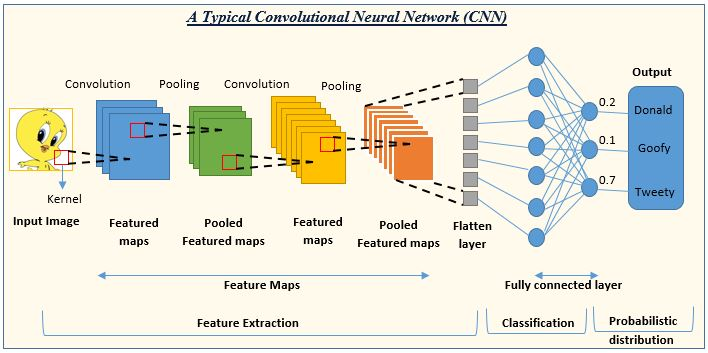

## Key components related to CNNs:


* **Convolutional Layers**: The building blocks of CNNs, convolutional layers apply convolution operations to the input image. These operations involve sliding a small filter (also known as a kernel) over the input image to extract features such as edges, textures, and patterns.

 - Each filter in a convolutional layer learns to detect a specific feature within its receptive field.

* **Pooling Layers**: Pooling layers downsample the feature maps produced by the convolutional layers, reducing their spatial dimensions while retaining the most important information. Max pooling, Global pooling and average pooling are common pooling operations used in CNNs.

* **Activation Functions**: Activation functions introduce non-linearity into the CNN, allowing the model to learn complex relationships between the input and output. Common activation functions include ReLU (Rectified Linear Unit) and tanh.

* **Fully Connected Layers**: Fully connected (or dense) layers connect every neuron in one layer to every neuron in the next layer, enabling the model to perform high-level reasoning and classification based on the learned features.

* **Training with Backpropagation**: CNNs are trained using the backpropagation algorithm, which adjusts the weights/bais of the network to minimize the difference between the predicted output and the ground truth labels.

  - This process involves forward propagation to compute predictions, followed by backward propagation to compute gradients and update the weights using optimization algorithms such as stochastic gradient descent (SGD), Adam, or RMSprop.

* **Pretrained Models and Transfer Learning**: Pretrained CNN models, such as VGGNET, ResNet, and MobileNet, have been trained on large datasets like ImageNet and can be used as feature extractors or fine-tuned for specific tasks with limited data.
  - Transfer learning involves leveraging the learned representations from these pretrained models to improve performance on new tasks.

## CNN Model Implementation

## Importing Dataset:


In this implementation I am using Cat-Dog Data from Kaggle:

https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
from google.colab import files
files.upload() #enviar o arquivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rweitzel","key":"8ae252c2558553a4e15362842df02973"}'}

In [ ]:
!pip install kaggle -q

* instru No linux

* No windows apenas crie um pasta ./kaggle em users

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           2624         36  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          10676        233  0.9411765        
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           3744         86  1.0              
abdullah0a/retail-sales-data-with-seasonal-trends-and-m

In [ ]:
%cd /content

/content


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout, Input

## Generators


To batch wise upload data to system.

In [ ]:
# Training Data

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Validation Data
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.




## Normalize

The images are stored in numpy array format (0-255), to which we need to normalize btw (0-1)

In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## CNN Model

-- To reduce overfitting we will use:

* Dropout
* Batch Normalization


In [ ]:
model = Sequential()
model.add(Input(shape=(256,256,3)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

### Rede neural convolucional (CNN) para classificar imagens da base de dados "Cats and Dogs" do Kaggle.

## Código Explicado

1. **Inicialização do Modelo Sequencial**:
   ```python
   model = Sequential()
   ```
   - **Sequential()**: Cria um modelo sequencial, que é uma pilha linear de camadas.

2. **Camada de Entrada**:
   ```python
   model.add(Input(shape=(256, 256, 3)))
   ```
   - **Input(shape=(256, 256, 3))**: Define a forma da entrada como imagens de 256x256 pixels com 3 canais de cor (RGB).

3. **Primeira Camada Convolucional**:
   ```python
   model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
   ```
   - **Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu')**: Adiciona uma camada convolucional com 32 filtros de tamanho 3x3, sem preenchimento adicional (`padding='valid'`), e usa a função de ativação ReLU.

4. **Normalização por Lote**:
   ```python
   model.add(BatchNormalization())
   ```
   - **BatchNormalization()**: Normaliza a saída da camada anterior para acelerar o treinamento e melhorar a estabilidade do modelo.

5. **Primeira Camada de Pooling**:
   ```python
   model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
   ```
   - **MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')**: Reduz a dimensionalidade, tomando o valor máximo em cada janela 2x2, com um passo de 2.

6. **Segunda Camada Convolucional**:
   ```python
   model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
   ```
   - **Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu')**: Adiciona uma segunda camada convolucional com 64 filtros de tamanho 3x3 e função de ativação ReLU.

7. **Normalização por Lote**:
   ```python
   model.add(BatchNormalization())
   ```
   - **BatchNormalization()**: Normaliza a saída da camada anterior.

8. **Segunda Camada de Pooling**:
   ```python
   model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
   ```
   - **MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')**: Reduz a dimensionalidade com janelas 2x2 e passo de 2.

9. **Terceira Camada Convolucional**:
   ```python
   model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
   ```
   - **Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu')**: Adiciona uma terceira camada convolucional com 128 filtros de tamanho 3x3 e função de ativação ReLU.

10. **Normalização por Lote**:
    ```python
    model.add(BatchNormalization())
    ```
    - **BatchNormalization()**: Normaliza a saída da camada anterior.

11. **Terceira Camada de Pooling**:
    ```python
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
    ```
    - **MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')**: Reduz a dimensionalidade com janelas 2x2 e passo de 2.

12. **Camada de Flatten**:
    ```python
    model.add(Flatten())
    ```
    - **Flatten()**: Achata a saída das camadas convolucionais em um vetor 1D para ser usado pelas camadas densas.

13. **Primeira Camada Densa**:
    ```python
    model.add(Dense(128, activation='relu'))
    ```
    - **Dense(128, activation='relu')**: Adiciona uma camada densa com 128 neurônios e função de ativação ReLU.

14. **Dropout**:
    ```python
    model.add(Dropout(0.1))
    ```
    - **Dropout(0.1)**: Desativa aleatoriamente 10% dos neurônios durante o treinamento para evitar overfitting.

15. **Segunda Camada Densa**:
    ```python
    model.add(Dense(64, activation='relu'))
    ```
    - **Dense(64, activation='relu')**: Adiciona uma camada densa com 64 neurônios e função de ativação ReLU.

16. **Dropout**:
    ```python
    model.add(Dropout(0.1))
    ```
    - **Dropout(0.1)**: Desativa aleatoriamente 10% dos neurônios durante o treinamento.

17. **Camada de Saída**:
    ```python
    model.add(Dense(1, activation='sigmoid'))
    ```
    - **Dense(1, activation='sigmoid')**: Adiciona a camada de saída com 1 neurônio e função de ativação sigmoid para produzir uma probabilidade de classificação binária (gato ou cachorro).

### Resumo

- **Camadas Convolucionais e Pooling**: Extraem características das imagens e reduzem a dimensionalidade.
- **Normalização por Lote**: Melhora a estabilidade e acelera o treinamento.
- **Camadas Densas e Dropout**: Realizam a classificação final e ajudam a evitar overfitting.
- **Camada de Saída**: Usa sigmoid para produzir uma probabilidade de classificação binária.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

Para mostrar a arquitetura da rede em um gráfico, você pode usar a função `plot_model` da biblioteca Keras. Essa função gera uma visualização da arquitetura do modelo e pode salvar a imagem em um arquivo.

### Código para Plotar a Arquitetura do Modelo

1. **Instale as dependências necessárias**:
   - Você precisará das bibliotecas `pydot` e `graphviz`. Pode instalá-las usando pip:
     ```bash
     pip install pydot graphviz
     ```

2. **Código para plotar a arquitetura**:
   ```python
   from tensorflow.keras.utils import plot_model
   import tensorflow as tf
  ```

   
  ```python
   # Plotar a arquitetura do modelo
   plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
   ```

### Explicação

- **plot_model**: Esta função gera uma visualização da arquitetura do modelo.
  - **model**: O modelo Keras que você deseja visualizar.
  - **to_file**: O nome do arquivo onde a imagem será salva.
  - **show_shapes**: Se `True`, mostra as formas das entradas e saídas de cada camada.
  - **show_layer_names**: Se `True`, mostra os nomes das camadas.





In [ ]:
!pip install pydot graphviz

In [ ]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

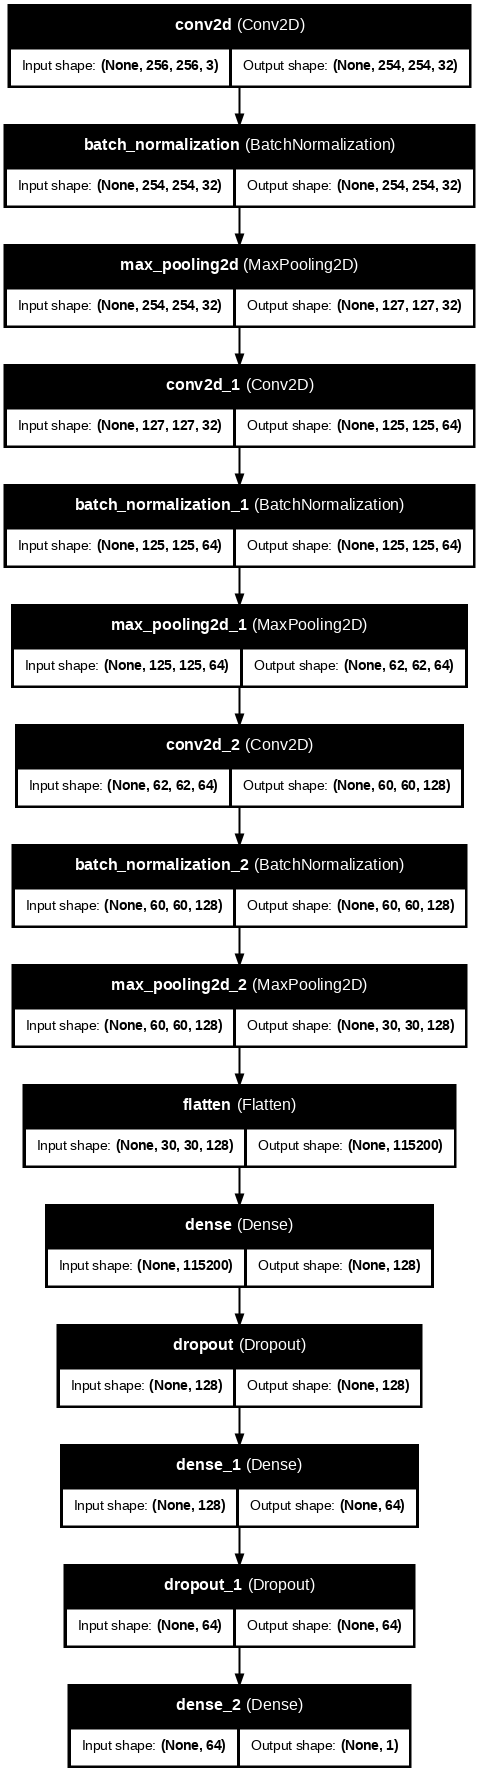

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=72)

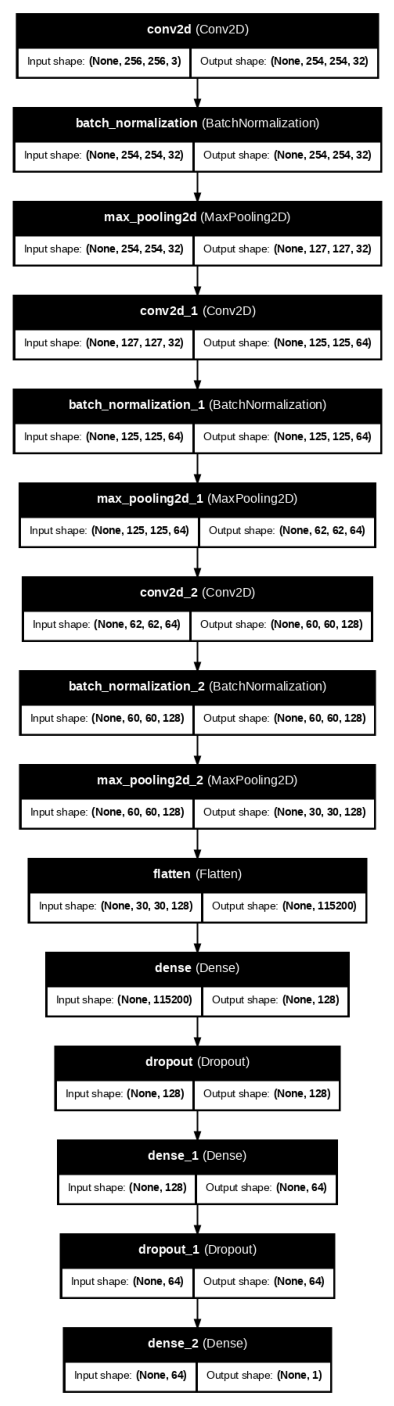

In [ ]:
# Carregar a imagem gerada
img = mpimg.imread('model_architecture.png')

# Definir o tamanho da figura
plt.figure(figsize=(18, 18))  # Ajuste o tamanho conforme necessário

# Mostrar a imagem
plt.imshow(img)
plt.axis('off')  # Desativar os eixos
plt.show()


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.5486 - loss: 2.9432 - val_accuracy: 0.6144 - val_loss: 0.6512
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 79ms/step - accuracy: 0.6437 - loss: 0.6384 - val_accuracy: 0.6716 - val_loss: 0.6049
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6784 - loss: 0.6269 - val_accuracy: 0.6634 - val_loss: 0.6573
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7103 - loss: 0.5632 - val_accuracy: 0.7180 - val_loss: 0.5585
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7369 - loss: 0.5214 - val_accuracy: 0.7384 - val_loss: 0.5149
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7679 - loss: 0.4777 - val_accuracy: 0.7566 - val_loss: 0.5946
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.7942 - loss: 0.4279 - val_accuracy: 0.7904 - val_loss: 0.4590
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.8151 - loss: 0.3925 - 

In [ ]:
import matplotlib.pyplot as plt

## Train VS Validation Accuracy


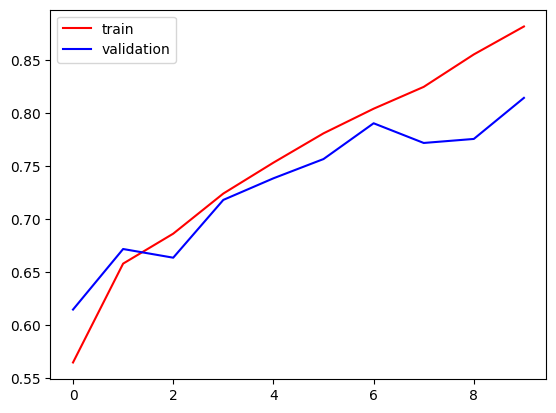

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Train VS Validation Loss


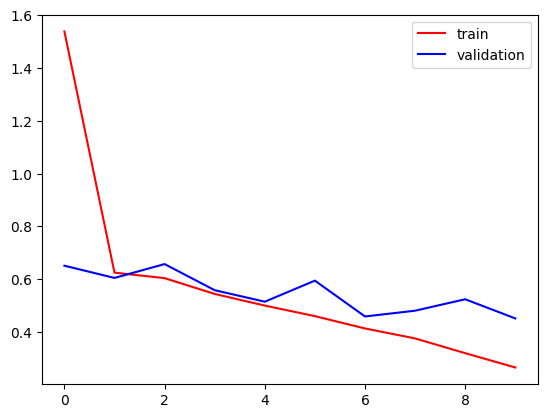

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Testando para Cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
A imagem é classificada como um gato.


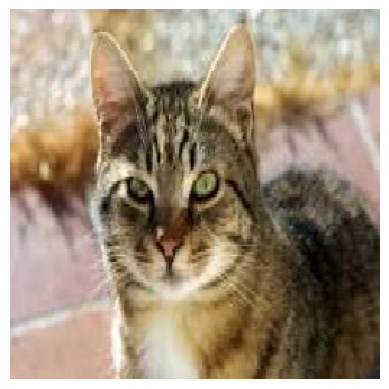

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Caminho para a imagem do gato
img_path = '/content/cat.jpg'

# Carregar a imagem com o tamanho esperado pelo modelo
img = image.load_img(img_path, target_size=(256, 256))

# Converter a imagem para um array numpy
img_array = image.img_to_array(img)

# Expandir as dimensões para corresponder ao formato esperado pelo modelo (1, 256, 256, 3)
img_array = np.expand_dims(img_array, axis=0)

# Normalizar a imagem
img_array /= 255.0

# Fazer a previsão
prediction = model.predict(img_array)

# Interpretar o resultado
if prediction[0] > 0.5:
    print("A imagem é classificada como um cachorro.")
else:
    print("A imagem é classificada como um gato.")

# Mostrar a imagem
plt.imshow(img)
plt.axis('off')
plt.show()


# Testando para dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
A imagem é classificada como um gato.


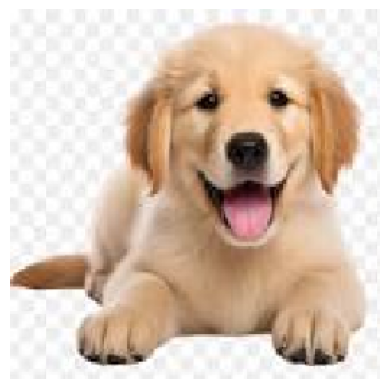

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Caminho para a imagem do gato
img_path = '/content/dog.jpg'

# Carregar a imagem com o tamanho esperado pelo modelo
img = image.load_img(img_path, target_size=(256, 256))

# Converter a imagem para um array numpy
img_array = image.img_to_array(img)

# Expandir as dimensões para corresponder ao formato esperado pelo modelo (1, 256, 256, 3)
img_array = np.expand_dims(img_array, axis=0)

# Normalizar a imagem
img_array /= 255.0

# Fazer a previsão
prediction = model.predict(img_array)

# Interpretar o resultado
if prediction[0] > 0.5:
    print("A imagem é classificada como um cachorro.")
else:
    print("A imagem é classificada como um gato.")

# Mostrar a imagem
plt.imshow(img)
plt.axis('off')
plt.show()


# testar com outras imagens